<a href="https://colab.research.google.com/github/jnksgit/Hoffmann-2022-rs/blob/main/Model2raster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install earthpy

In [ ]:
!pip install pyrsgis

In [ ]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from google.colab import files
import io

In [ ]:
import os
import rasterio
from pyrsgis import raster
from pyrsgis.convert import changeDimension

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pwd

'/content/drive/MyDrive/DNN_data/Model/Bands'

In [ ]:
%cd .'/drive/MyDrive/DNN_data/Model/Bands'

[Errno 2] No such file or directory: './drive/MyDrive/DNN_data/Model/Bands'
/content/drive/MyDrive/DNN_data/Model/Bands


In [ ]:
pwd

'/content/drive/MyDrive/DNN_data/Model/Bands'

In [ ]:
ls

alb_vh_100.tif  hai_vh_100.tif  Model/          sch_vv_100.tif
alb_vv_100.tif  hai_vv_100.tif  sch_vh_100.tif


In [ ]:
# Load model from Google Drive folder
model = keras.models.load_model('Model')

In [ ]:
# Create file list with predictors
file_list = ("sch_vh_100.tif", "sch_vv_100.tif")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_list

('sch_vh_100.tif', 'sch_vv_100.tif')

In [ ]:
arr_st, meta = es.stack(file_list)

In [ ]:
meta

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 532, 'height': 477, 'count': 2, 'crs': CRS.from_epsg(32632), 'transform': Affine(100.0, 0.0, 793830.0,
       0.0, -100.0, 5908470.0), 'tiled': False, 'interleave': 'band'}

In [ ]:
# Deplete dimension of the raster data so that the model can read it
myrast_reshape = changeDimension(arr_st)

The "changeDimension()" function has moved to "array_to_table()" and will be deprecated in future versions. Please check the pyrsgis documentation at https://pyrsgis.readthedocs.io/en/master/ for more details.


In [ ]:
# Predict study variable based on raster data
myrast_pred = model.predict(myrast_reshape)

In [ ]:
arr_st.shape

(2, 477, 532)

In [ ]:
# Reshape raster so that it can be exported as GeoTIFF data
prediction = np.reshape(myrast_pred, (arr_st.shape[1], arr_st.shape[2]))

In [ ]:
with rasterio.open('HAI_dbh_preds.tif', 'w', 
                   driver = "Gtiff",
                   height= prediction.shape[0],
                   width= prediction.shape[1],
                   count = 1,
                   dtype = prediction.dtype,
                   crs = meta['crs'],
                   transform = meta['transform']
                   ) as dst:
    dst.write(prediction, 1)

In [ ]:
print(np.amax(arr_st))
print(np.amin(arr_st))

17.22653
-30.930517


In [ ]:
myrast_masked = np.ma.masked_values(arr_st, np.amin(arr_st))

In [ ]:
print(np.amax(prediction))
print(np.amin(prediction))

175.85739
6.12709


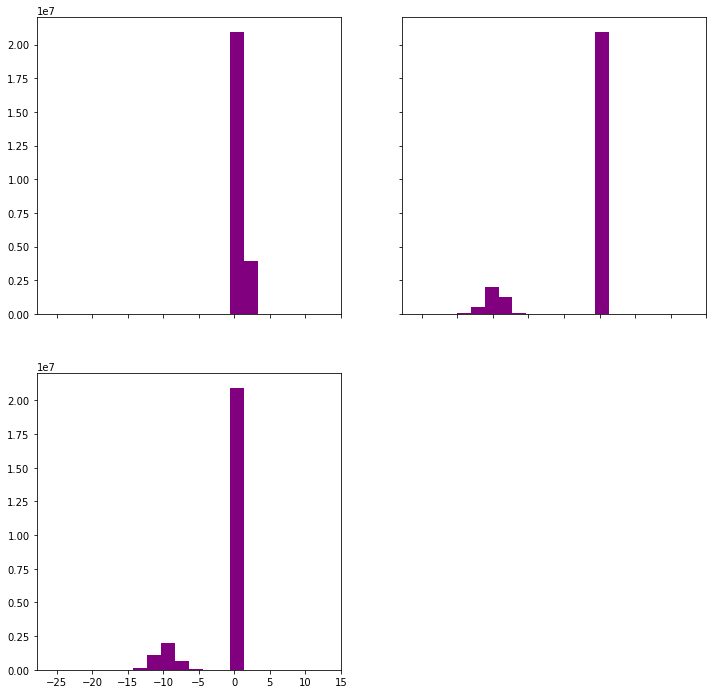

In [ ]:
ep.hist(myrast_masked)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy.ma as ma

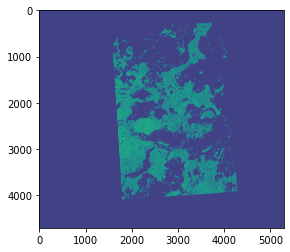

In [ ]:
plt.imshow(prediction)
prediction_masked = ma.masked_greater(prediction, 100, copy=True)